In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from causacore import SyntheticData, Model
import numpy as np

np.random.seed(123) # Set seed for reproducibility

style = {
    "figure.figsize": (8, 5),  # Figure size in inches
    "axes.facecolor": "#1b1917",  # Axes background color
    "figure.facecolor": "#1b1917",  # Figure background color
    "grid.color": "white",  # Grid color
    "grid.linestyle": "-",  # Grid line style
    "grid.linewidth": 0.5,  # Grid line width
    "axes.labelcolor": "white",  # Axes label color
    "axes.labelsize": 18,  # Axes label size
    "axes.titlesize": 18,  # Axes title size
    "xtick.color": "white",  # X-tick color
    "ytick.color": "white",  # Y-tick color
    "xtick.labelsize": 18,  # X-tick label size
    "ytick.labelsize": 18,  # Y-tick label size
    "lines.linewidth": 2,  # Line width
    "lines.markersize": 8,  # Marker size
    "legend.fontsize": 18,  # Legend font size
    "legend.facecolor": "#1b1917",  # Legend background color
    "legend.edgecolor": "white",  # Legend edge color
    "legend.shadow": True,  # Legend shadow
    "font.family": "Helvetica",  # Font
}

import matplotlib.pyplot as plt
plt.style.use(style)

In [28]:
# Node specifications based on the final graph
node_specs = {
    "Input_A": {"mean": 100, "std": 20, "min": 0, "max": 200},
    "Input_B": {"mean": 120, "std": 30, "min": 0, "max": 240},
    "Input_C": {"mean": 80, "std": 15, "min": 0, "max": 160},
    "Setting_A1": {"mean": 0.6, "std": 0.25, "min": 0, "max": 1, "r2": 0.3},
    "Setting_A2": {"mean": 0.7, "std": 0.25, "min": 0, "max": 1, "r2": 0.3},
    "Setting_A3": {"mean": 0.8, "std": 0.25, "min": 0, "max": 1, "r2": 0.3},
    "Setting_B1": {"mean": 0.4, "std": 0.25, "min": 0, "max": 1, "r2": 0.3},
    "Setting_B2": {"mean": 0.5, "std": 0.25, "min": 0, "max": 1, "r2": 0.3},
    "Setting_B3": {"mean": 0.6, "std": 0.25, "min": 0, "max": 1, "r2": 0.5},
    "Setting_C1": {"mean": 0.5, "std": 0.25, "min": 0, "max": 1, "r2": 0.3},
    "Setting_C2": {"mean": 0.6, "std": 0.25, "min": 0, "max": 1, "r2": 0.3},
    "Yield_A1": {"mean": 0.6, "std": 0.25, "min": 0, "max": 1, "r2": 0.8},
    "Yield_A2": {"mean": 0.7, "std": 0.25, "min": 0, "max": 1, "r2": 0.85},
    "Yield_A3": {"mean": 0.8, "std": 0.25, "min": 0, "max": 1, "r2": 0.9},
    "Yield_B1": {"mean": 0.5, "std": 0.25, "min": 0, "max": 1, "r2": 0.8},
    "Yield_B2": {"mean": 0.6, "std": 0.25, "min": 0, "max": 1, "r2": 0.85},
    "Yield_B3": {"mean": 0.7, "std": 0.25, "min": 0, "max": 1, "r2": 0.9},
    "Yield_C1": {"mean": 0.4, "std": 0.25, "min": 0, "max": 1, "r2": 0.75},
    "Yield_C2": {"mean": 0.5, "std": 0.25, "min": 0, "max": 1, "r2": 0.8},
    "Output": {"mean": 0.8, "std": 0.1, "min": 0, "max": 1, "r2": 0.95}
}

# Edge specifications based on the final graph
edge_specs = [
    {"nodes": ("Input_A", "Yield_A1"), "effect": 1},
    {"nodes": ("Input_B", "Yield_B1"), "effect": 1},
    {"nodes": ("Input_C", "Yield_C1"), "effect": 1},
    {"nodes": ("Setting_A1", "Yield_A1"), "effect": -1},
    {"nodes": ("Setting_A2", "Yield_A2"), "effect": 3},
    {"nodes": ("Setting_A3", "Yield_A3"), "effect": 1},
    {"nodes": ("Setting_B1", "Yield_B1"), "effect": 3},
    {"nodes": ("Setting_B2", "Yield_B2"), "effect": -1},
    {"nodes": ("Setting_B3", "Yield_B3"), "effect": 1},
    {"nodes": ("Setting_C1", "Yield_C1"), "effect": 1},
    {"nodes": ("Setting_C2", "Yield_C2"), "effect": 1},
    {"nodes": ("Yield_A1", "Yield_A2"), "effect": 1},
    {"nodes": ("Yield_A2", "Yield_A3"), "effect": 1},
    {"nodes": ("Yield_A3", "Output"), "effect": 1},
    {"nodes": ("Yield_B1", "Yield_B2"), "effect": 1},
    {"nodes": ("Yield_B1", "Yield_C1"), "effect": 1},
    {"nodes": ("Yield_B2", "Yield_B3"), "effect": 1},
    {"nodes": ("Yield_B3", "Output"), "effect": 1},
    {"nodes": ("Yield_C1", "Yield_C2"), "effect": 1},
    {"nodes": ("Yield_C2", "Output"), "effect": 1}
]

# Synthetic data generation
data_generator = SyntheticData(node_specs, edge_specs)
data = data_generator.generate_data(num_samples=365)

In [29]:
# Round data to 2dp and save to CSV
data.round(2).to_csv("production_data.csv", index=False)

In [30]:
nodes = list(node_specs.keys())
edges = [(edge["nodes"][0], edge["nodes"][1]) for edge in edge_specs]

# Save nodes and edges to JSON
import json
with open("nodes.json", "w") as f:
    json.dump(nodes, f)

with open("edges.json", "w") as f:
    json.dump(edges, f)

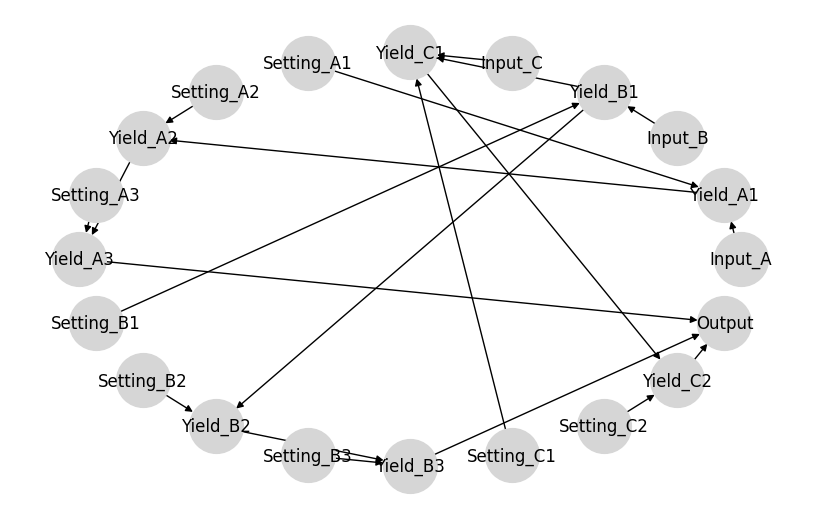

In [31]:

# Define and train the model
model = Model(nodes=nodes, edges=edges)
model.train(data)

# Plot diagnostics
model.diagnostics.plot()

In [32]:
optimal_config = model.query.find_best_actions(
    targets={"Output": "maximise"},
    actionable=["Setting_A1", "Setting_A2", "Setting_A3", "Setting_B1", "Setting_B2", "Setting_B3", "Setting_C1", "Setting_C2"],
    fixed={"Input_A": 100, "Input_B": 120, "Input_C": 80}
)

optimal_config.round(2)

,Setting_A1,Setting_A2,Setting_A3,Setting_B1,Setting_B2,Setting_B3,Setting_C1,Setting_C2
0,0.0,0.92,0.86,0.56,0.53,0.97,0.46,0.54


In [33]:
action = optimal_config.to_dict(orient="list")
action = {k: v[0] for k, v in action.items()}
output_achieved_causal = data_generator.forward(action).mean().round(2)["Output"]

/var/folders/1t/s8y7czq113g2f7xb0q27lsyh0000gn/T/ipykernel_27698/1030185301.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4, color="white")


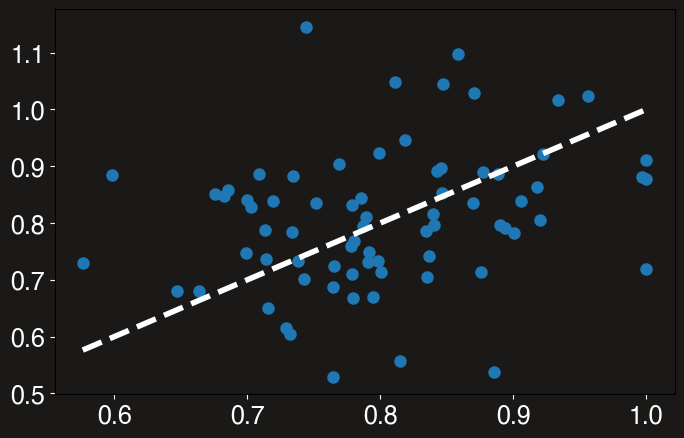

In [34]:
# Fit neural network
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(columns=["Output"])
y = data["Output"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn = MLPRegressor(hidden_layer_sizes=(256, 256, 256), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

# nn = XGBRegressor(random_state=42)
# nn.fit(X_train, y_train)

# y_pred = nn.predict(X_test)

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

# Plot y_test vs y_pred
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4, color="white")

In [35]:
output_original = data.head().mean().round(2)["Output"]

In [36]:
# Run optimisation routine using neural network to find optimal configuration
from scipy.optimize import minimize
import pandas as pd

actionable = ["Setting_A1", "Setting_A2", "Setting_A3", "Setting_B1", "Setting_B2", "Setting_B3", "Setting_C1", "Setting_C2"]

def objective_function(action: list):
    # Convert from (-inf, inf) to (0, 1)
    action = [1 / (1 + 2.718281828459045 ** -x) for x in action]
    new_values = {k: v for k, v in zip(actionable, action)}
    fixed = {"Input_A": 100, "Input_B": 120, "Input_C": 80}
    input_values = X.mean().to_dict()
    input_values.update(new_values)
    input_values.update(fixed)
    input_values = pd.DataFrame(input_values, index=[0])
    return -nn.predict(input_values)

initial_guess = [0] * len(actionable)
result = minimize(objective_function, initial_guess, method="Nelder-Mead")

action = {k: v for k, v in zip(actionable, result.x)}

# Convert from (-inf, inf) to (0, 1)
action = {k: 1 / (1 + 2.718281828459045 ** -v) for k, v in action.items()}

output_achieved_neuralnet = data_generator.forward(action).mean().round(2)["Output"]

In [37]:
print(f"Original yield: {output_original}")
print(f"Yield achieved using causal model: {output_achieved_causal}")
print(f"Yield achieved using neural network: {output_achieved_neuralnet}")

Original yield: 0.81
Yield achieved using causal model: 0.91
Yield achieved using neural network: 0.57


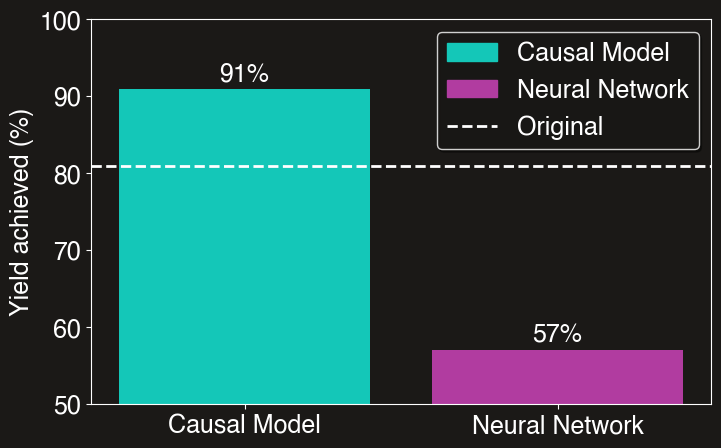

In [38]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Bar chart showing the difference between causal and neural network models compared to the original yield
plt.bar(
    ["Causal Model", "Neural Network"], 
    [output_achieved_causal*100, output_achieved_neuralnet*100],
    color=["#14c7b8", "#b13ca0"]
)
plt.ylabel("Yield achieved (%)")
plt.axhline(output_original*100, color="white", linestyle="--", linewidth=2)
plt.ylim(50, 100)
# Create legend with white text color
blue_patch = mpatches.Patch(color="#14c7b8", label='Causal Model')
red_patch = mpatches.Patch(color="#b13ca0", label='Neural Network')
black_line = mlines.Line2D([], [], color='white', linestyle='--', label='Original')

plt.legend(handles=[blue_patch, red_patch, black_line], labelcolor="white")

# Add text labels on each bar comparing to original yield
plt.text(0, output_achieved_causal*100 + 1, f"{output_achieved_causal*100:.0f}%", ha="center", color="white", size=18)
plt.text(1, output_achieved_neuralnet*100 + 1, f"{output_achieved_neuralnet*100:.0f}%", ha="center", color="white", size=18)

# Set the borders to white
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Save figure with a high DPI (same scale)
plt.savefig("yield_comparison.png", dpi=300)

plt.show()